# 🧬 Breast Cancer Diagnosis – Dataset Overview and Initial Exploration

This project aims to predict whether a tumor is **malignant** or **benign** based on clinical features extracted from digitized images of breast mass cell nuclei.

The dataset, sourced from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)), includes numerical characteristics of cell nuclei and a binary diagnosis label (`M` = malignant, `B` = benign).

---

## 🧭 Table of Contents

1. [Dataset Summary](#dataset-summary)  
2. [Data Structure and Initial Checks](#data-structure-and-initial-checks)  
3. [Target Variable Analysis](#target-variable-analysis)  
4. [Feature Overview](#feature-overview)  
5. [Initial Insights](#initial-insights)


## 1. Dataset Summary <a id="dataset-summary"></a>

- **Source**: UCI ML Breast Cancer Wisconsin (Diagnostic) Dataset  
- **Samples**: 569 observations  
- **Features**: 30 numerical features derived from cell nuclei images:
  - For each of 10 characteristics (e.g., radius, texture, perimeter), the dataset includes:
    - Mean value
    - Standard error
    - Worst value (largest mean of the three worst/largest measurements)
- **Target Variable**: 
  - `diagnosis`: Malignant (`M`) or Benign (`B`)
- **Other Columns**:
  - `id`: Sample identifier, may be removed before modeling
  - `Unnamed: 32`: Appears to be an empty column (to be confirmed)


## 🧬 Clinical Context: How Tumor Morphology Relates to Diagnostic Features

This dataset is based on digitized images obtained from fine needle aspiration (FNA) of breast masses. The goal is to distinguish between **benign** and **malignant** tumors using features extracted from the morphology (shape and structure) of **cell nuclei** observed under a microscope.

> For example, computer-aided diagnosis (CAD) tools have been shown to improve the sensitivity of breast cancer detection in mammography by 7.2% according to a large-scale retrospective study [(Lehman et al., 2015)](https://pubmed.ncbi.nlm.nih.gov/25758600/).

Understanding how these features relate to the biological nature of tumors is essential:

---

### 🧠 Benign vs. Malignant Tumors

| Characteristic        | Benign Tumors                         | Malignant Tumors                         |
|-----------------------|----------------------------------------|------------------------------------------|
| Growth                | Slow                                   | Fast                                     |
| Borders               | Smooth, regular                        | Irregular, spiky                         |
| Invasiveness          | Localized, non-invasive                | Invades nearby tissue                    |
| Metastasis            | Absent                                 | Can spread to other parts of the body   |
| Cell Nuclei           | Uniform, round, symmetrical            | Large, irregular, asymmetric             |

---

### 🔍 How the Features Capture These Differences

The dataset includes 30 numerical features derived from 10 base measurements. Each one is captured using 3 statistical types: `mean`, `standard error`, and `worst` (most extreme value). Here's how they relate to tumor biology:

| Feature Base          | Clinical Interpretation                                                 |
|-----------------------|--------------------------------------------------------------------------|
| **radius / perimeter / area** | Measure the size of the nucleus – tumors are often larger when malignant |
| **smoothness / compactness** | Describe how regular the nucleus edges are – benign ones are smoother      |
| **concavity / concave points** | Capture the severity and number of edge indentations – often high in malignant cells |
| **symmetry**          | Benign nuclei tend to be more symmetrical                              |
| **fractal_dimension** | Indicates boundary complexity – higher values reflect chaotic borders   |

---

### 🧪 Why This Matters for Machine Learning

These features are not arbitrary – they are grounded in the **visual and structural changes caused by cancer**. Including this context allows us to:

- Select features based on biological relevance, not just statistical correlation  
- Interpret model results in a clinically meaningful way  
- Justify the predictive power of specific features like `concave_points_worst` or `fractal_dimension_worst`

---

> This biomedical insight strengthens the project's interpretability and real-world applicability.


## 2. Objectives of this Section <a id="objectives-of-this-section"></a>

Before diving into data cleaning and model training, it is essential to explore the dataset to understand its structure, contents, and potential quality issues.

This section aims to:

- Load the dataset into a Pandas DataFrame  
- Review the number of rows and columns  
- Check for null or empty values  
- Detect duplicate entries or unnecessary identifiers  
- Examine column names and data types  
- Analyze the class distribution of the target variable (`diagnosis`)

These initial checks will guide how we prepare the data for modeling and ensure the reliability of downstream results.

In [1]:
# 1. Load the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
df = pd.read_csv('../data/raw/data.csv')
# 2. Check the number of rows and columns
print(f"Dataset shape: {df.shape[0]} rows, {df.shape[1]} columns")

# 3. Check for null values in each column
null_summary = df.isnull().sum()
print("\nMissing values per column:\n")
print(null_summary[null_summary > 0] if null_summary.sum() > 0 else "✅ No missing values found.")

# 4. Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")

# 5. Display the list of columns and their data types
print("\nColumn data types:\n")
print(df.dtypes)

# 6. Analyze the distribution of the target variable
print("\nDiagnosis value counts:\n")
print(df["diagnosis"].value_counts())
print("\nDiagnosis distribution (%):\n")
print(df["diagnosis"].value_counts(normalize=True).map(lambda x: f"{x:.2%}"))

Dataset shape: 569 rows, 33 columns

Missing values per column:

Unnamed: 32    569
dtype: int64

Number of duplicate rows: 0

Column data types:

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_wor

In [2]:
pd.set_option('display.max_columns', 30) 
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,...,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,...,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,...,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,...,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,...,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,...,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## 3. Target Variable Analysis <a id="target-variable-analysis"></a>

The target variable in this dataset is `diagnosis`, which indicates whether the tumor is **malignant** (`M`) or **benign** (`B`).

In this section, we will:

- Review the class distribution (counts and percentages)
- Visualize the balance of the target variable using a bar plot
- Reflect on whether class imbalance might affect model performance

Understanding class proportions is essential, especially in medical applications where false negatives may carry serious consequences.

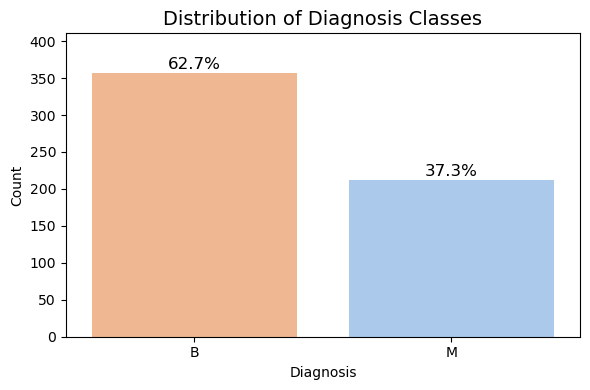

In [3]:
# Ensure figure output directory exists
os.makedirs("../outputs/figures", exist_ok=True)

# Ensure consistent order for plotting and annotation
order = ["B", "M"]
diagnosis_counts = df["diagnosis"].value_counts().reindex(order)
diagnosis_percent = df["diagnosis"].value_counts(normalize=True).reindex(order) * 100

# Plot with fixed order
plt.figure(figsize=(6, 4))
sns.countplot(x="diagnosis", hue='diagnosis', data=df, order=order, palette="pastel")
plt.title("Distribution of Diagnosis Classes", fontsize=14)
plt.xlabel("Diagnosis")
plt.ylabel("Count")

# Set upper limit with padding
plt.ylim(0, diagnosis_counts.max() * 1.15)

# Annotate with percentages correctly
for i, count in enumerate(diagnosis_counts):
    percent = diagnosis_percent.iloc[i]
    plt.text(i, count + 5, f"{percent:.1f}%", ha='center', fontsize=12)

plt.tight_layout()
plt.savefig("../outputs/figures/diagnosis_distribution.png", dpi=300)
plt.show()

## 4. Feature Overview <a id="feature-overview"></a>

The dataset includes 30 numerical features extracted from digitized images of fine needle aspirate (FNA) of breast masses. These features describe characteristics of the cell nuclei present in the image.

There are 10 base measurements, each computed in three ways:

- **mean**: average value across the cell nuclei
- **se**: standard error of the measurement
- **worst**: worst or largest value observed

### Base feature types:
- radius
- texture
- perimeter
- area
- smoothness
- compactness
- concavity
- concave points
- symmetry
- fractal dimension

### Feature naming format:
Each column follows the pattern:  
`[feature]_[statistic]`, e.g., `radius_mean`, `area_worst`, `smoothness_se`

In this section, we will:
- Review the full list of feature names
- Group features by their measurement type
- Analyze whether features appear consistently across the three statistical categories


In [4]:
# Drop non-feature columns
df_features = df.drop(columns=["id", "diagnosis", "Unnamed: 32"])

# Extract feature column names
feature_cols = df_features.columns

# Split feature name into base name and statistic suffix
split_features = pd.DataFrame(
    [( "_".join(col.split("_")[:-1]), col.split("_")[-1] ) for col in feature_cols],
    columns=["feature", "stat"]
)

# Display how many features fall under each statistical group
print("📊 Feature count per statistic type:\n")
print(split_features["stat"].value_counts())

📊 Feature count per statistic type:

stat
mean     10
se       10
worst    10
Name: count, dtype: int64


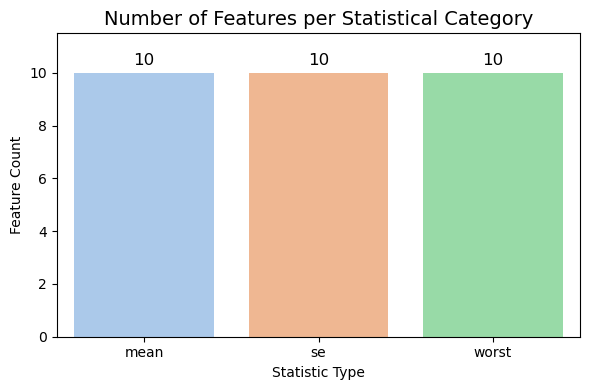

In [5]:
# Count features per stat type
stat_counts = split_features["stat"].value_counts()
# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=stat_counts.index, y=stat_counts.values,hue=stat_counts.index, palette="pastel")

plt.title("Number of Features per Statistical Category", fontsize=14)
plt.xlabel("Statistic Type")
plt.ylabel("Feature Count")

# Set y-limit with padding
plt.ylim(0, stat_counts.max() * 1.15)

# Annotate bars
for i, count in enumerate(stat_counts.values):
    plt.text(i, count + 0.3, str(count), ha='center', fontsize=12)

plt.tight_layout()
plt.savefig("../outputs/figures/feature_stats_distribution.png", dpi=300)
plt.show()

### 📊 Feature Grouping by Statistical Category

The bar chart above shows the number of predictor variables for each statistical category:

- `mean`: average value of the feature across all nuclei
- `se`: standard error of the feature
- `worst`: worst (maximum) observed value for the feature

> 🔬 For instance, features related to `worst` measurements may correlate more strongly with malignancy, as they capture the most extreme morphological distortions observed in tumor cell nuclei — which are often signs of aggressive or invasive cancer.


Each of the 10 core measurements (e.g., `radius`, `texture`, `area`) is represented in all three statistical categories, resulting in:

- 10 `mean` features  
- 10 `se` features  
- 10 `worst` features

This uniform structure confirms that the dataset is well-organized and complete. It also opens up options for:
- Modeling with a selected subset (e.g., only `mean`)
- Dimensionality reduction by statistical group
- Targeted feature selection strategies


## 5. Initial Insights <a id="initial-insights"></a>

Based on the exploratory analysis conducted so far, we can summarize the following observations and considerations:

---

### 📌 Dataset Integrity

- The dataset is complete, with **569 samples** and no missing values.
- The column `Unnamed: 32` is empty and was removed.
- The `id` column is a non-informative identifier and was also excluded.
- The target variable `diagnosis` is binary and clearly labeled (`B` for benign, `M` for malignant).

---

### 📊 Class Balance

- The target classes are **moderately imbalanced**:
  - Benign (`B`): ~63%
  - Malignant (`M`): ~37%
- This imbalance must be considered during model evaluation using metrics beyond accuracy (e.g., precision, recall, AUC).

---

### 🧬 Feature Structure

- The dataset includes **30 numeric features**, derived from 10 core measurements.
- Each measurement is represented in 3 forms: `mean`, `se`, and `worst`.
- The feature naming is consistent and well-structured, which simplifies grouping and analysis.

---

### 🔮 Implications for Preprocessing

- Features may require **standardization or normalization** due to varying scales (e.g., `area_worst` vs. `smoothness_se`).
- Dimensionality reduction or feature selection could be explored to reduce redundancy.
- It may be interesting to compare models trained on:
  - All features vs. only `mean` features
  - Different statistical groups independently

---

### 📌 Next Steps

- Perform correlation analysis to detect multicollinearity
- Apply feature scaling
- Prepare training and test sets
- Begin baseline modeling (e.g., logistic regression)

---

> These insights guide the upcoming preprocessing and modeling phases. The next notebook will implement feature engineering, scaling, and data preparation for classification.
